In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glassdoor-data-science-jobs/glassdoor_jobs.csv


In [49]:
df=pd.read_csv("/kaggle/input/glassdoor-data-science-jobs/glassdoor_jobs.csv")

**<h1>Data Understanding**

In [50]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Data Scientist,$105K-$138K (Glassdoor Est.),• Be one of the first to join our rapidly grow...,5.0,Shelf Engine\n5.0,"Seattle, WA","Seattle, WA",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
996,Analytic Consultant 4 - Branch Banking Reporti...,$105K-$138K (Glassdoor Est.),Job Description\n\nImportant Note: During the ...,3.6,Wells Fargo\n3.6,"Dallas, TX","San Francisco, CA",10000+ employees,1852,Company - Public,Banks & Building Societies,Finance,₹500+ billion (INR),-1
997,Data Scientist,$105K-$138K (Glassdoor Est.),"THE COMPANY\n\nFannie Mae provides reliable, l...",3.6,Fannie Mae\n3.6,"Washington, DC","Washington, DC",5001 to 10000 employees,1938,Company - Public,Investment Banking & Asset Management,Finance,₹500+ billion (INR),Freddie Mac
998,Data Scientist,$105K-$138K (Glassdoor Est.),Ready to write the best chapter of your career...,3.9,XSELL Technologies\n3.9,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# checking the null values in the dataframe
df.isna().sum()

<h3>Insight:<h3>  
    
1. The dataset contains 1000 rows and 14 columns.

2. There are no null values in the dataframe.

**<h2>Data Preprocessing**

<h4>I have extract a copy of the data from these columns into a new data frame job_df. We can continue to modify further without affecting the original data frame.

In [51]:
job_df=df.copy()

In [52]:
job_df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1
5,Data Scientist,$77K-$92K (Glassdoor Est.),Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies\n2.2,"Chantilly, VA","Chantilly, VA",1 to 50 employees,2000,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹100 to ₹500 million (INR),-1
6,Senior Data Engineer,$77K-$92K (Glassdoor Est.),"Senior Data Engineer\nLocation/City: Atlanta, ...",3.6,Steady\n3.6,"Atlanta, GA","Atlanta, GA",1 to 50 employees,2017,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
7,Data Scientist,$77K-$92K (Glassdoor Est.),Are you performance-driven and want your impac...,4.0,goTRG\n4.0,"Miami, FL","Miami, FL",501 to 1000 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹10 to ₹50 billion (INR),-1
8,"Associate Director, Data Science",$77K-$92K (Glassdoor Est.),About Veracyte\n\n\nVeracyte (Nasdaq: VCYT) is...,3.5,Veracyte\n3.5,"South San Francisco, CA","South San Francisco, CA",201 to 500 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),-1
9,Senior Data Scientist,$77K-$92K (Glassdoor Est.),Brinks Home Security™ is a proven leader in th...,3.4,Brinks Home Security\n3.4,"Dallas, TX","Farmers Branch, TX",1001 to 5000 employees,-1,Company - Public,Security Services,Business Services,Unknown / Non-Applicable,"ADT Security Services, Protection 1"


In [53]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ KB


In [54]:
job_df['Company Name'].value_counts()

Company Name
GSK\n3.9                          11
Moderna Therapeutics\n3.7         10
Xerox\n3.0                         8
Wells Fargo\n3.6                   8
Novartis\n3.9                      7
                                  ..
Robert Half\n3.5                   1
TransUnion\n3.9                    1
22nd Century Technologies\n3.7     1
Market America Inc\n4.0            1
Galorath Inc.\n3.8                 1
Name: count, Length: 723, dtype: int64

In [55]:
# separate the company name and rating from Company Name
job_df['Company Name'] = job_df['Company Name'].str.replace(r'\n\d+(\.\d+)?', '', regex=True)

In [56]:
job_df.tail(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
980,Data Scientist,$105K-$138K (Glassdoor Est.),"Hello, At OneAPPS, we are looking for a Data S...",2.9,OneAPPS,"Fairfax, VA","London, United Kingdom",51 to 200 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
981,"Sr. Scientist, Research & Development",$105K-$138K (Glassdoor Est.),The R&D Sr. Scientist is responsible for the h...,3.3,Ambry Genetics,"Aliso Viejo, CA","Aliso Viejo, CA",501 to 1000 employees,1999,Subsidiary or Business Segment,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,-1
982,Data Scientist,$105K-$138K (Glassdoor Est.),About HTI Labs\n\nHTI Labs fights human traffi...,-1.0,HTI Labs,"Omaha, NE","Omaha, NE",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1
983,Data Scientist,$105K-$138K (Glassdoor Est.),Data Scientist (Artificial Intelligence - A.I....,3.8,Swain Techs,"Bethesda, MD","Horsham, PA",1 to 50 employees,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹500 million to ₹1 billion (INR),-1
984,Data Scientist,$105K-$138K (Glassdoor Est.),Job Description\nTitle: Data Scientist\nLocati...,4.5,Smith Hanley Associates,"Cambridge, MA","New York, 061",1 to 50 employees,1980,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,"Kforce, PageGroup, Robert Half"
985,Data Scientist,$105K-$138K (Glassdoor Est.),"Data Scientist\n\nLocation : Birmingham, AL\n\...",-1.0,CCS IT,"Birmingham, AL",-1,-1,-1,-1,-1,-1,-1,-1
986,Big Data Engineer,$105K-$138K (Glassdoor Est.),"At SpringML, we are all about empowering the d...",4.4,SpringML,"Austin, TX","Pleasanton, CA",1 to 50 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
987,Data Scientist,$105K-$138K (Glassdoor Est.),Job Description\nThe Data Scientist\n\nThis in...,5.0,Ateroz,"Irving, TX","Plano, TX",Unknown,-1,Company - Public,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1
988,Data Scientist,$105K-$138K (Glassdoor Est.),YOUR ROLE\n\nCompIQ is building a future where...,-1.0,CompIQ,"New York, NY","New York, NY",1 to 50 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
989,"Clinical Scientist, Clinical Development, Tuca...",$105K-$138K (Glassdoor Est.),"Summary:\n\nThe Clinical Scientist, Clinical D...",4.1,"Seattle Genetics, Inc.","Seattle, WA","Bothell, WA",1001 to 5000 employees,1998,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),-1


In [57]:
job_df.Founded.value_counts()

Founded
-1       167
 2011     40
 2015     37
 1996     35
 1999     31
        ... 
 1925      1
 1864      1
 1903      1
 1979      1
 1969      1
Name: count, Length: 123, dtype: int64

In [58]:
# dropping -1 from Founded
job_df.drop(job_df[job_df['Founded'] == -1].index, inplace=True)

In [59]:
job_df['Salary Estimate'].value_counts()

Salary Estimate
$105K-$138K (Glassdoor Est.)          96
$ 17-$ 23 Per Hour(Glassdoor Est.)    30
$139K-$229K (Glassdoor Est.)          29
$50K-$63K (Glassdoor Est.)            29
$57K-$94K (Glassdoor Est.)            29
$95K-$165K (Glassdoor Est.)           28
$77K-$92K (Glassdoor Est.)            28
$106K-$143K (Glassdoor Est.)          28
$90K-$109K (Glassdoor Est.)           28
$41K-$73K (Glassdoor Est.)            27
$48K-$91K (Glassdoor Est.)            27
$81K-$137K (Glassdoor Est.)           27
$105K-$117K (Glassdoor Est.)          26
$81K-$102K (Glassdoor Est.)           26
$60K-$124K (Glassdoor Est.)           26
$49K-$88K (Glassdoor Est.)            26
$70K-$119K (Glassdoor Est.)           26
$108K-$140K (Glassdoor Est.)          25
$83K-$99K (Glassdoor Est.)            25
$88K-$133K (Glassdoor Est.)           24
$112K-$149K (Glassdoor Est.)          24
$71K-$108K (Glassdoor Est.)           24
$125K-$156K (Glassdoor Est.)          23
$68K-$119K (Glassdoor Est.)           22


In [60]:
# Removing (Glassdoor Est.) from 'Salary Estimate' column
job_df['Salary Estimate'] = job_df['Salary Estimate'].str.replace('(Glassdoor Est.)', '').str.strip()

In [61]:
job_df['Salary Estimate'].value_counts()

Salary Estimate
$105K-$138K           96
$ 17-$ 23 Per Hour    30
$139K-$229K           29
$50K-$63K             29
$57K-$94K             29
$95K-$165K            28
$77K-$92K             28
$106K-$143K           28
$90K-$109K            28
$41K-$73K             27
$48K-$91K             27
$81K-$137K            27
$105K-$117K           26
$81K-$102K            26
$60K-$124K            26
$49K-$88K             26
$70K-$119K            26
$108K-$140K           25
$83K-$99K             25
$88K-$133K            24
$112K-$149K           24
$71K-$108K            24
$125K-$156K           23
$68K-$119K            22
$86K-$108K            22
$92K-$146K            22
$59K-$101K            22
$73K-$128K            22
$72K-$121K            21
$110K-$145K           21
Name: count, dtype: int64

In [62]:
# convert "$17-$23 Per Hour" to monthly salary estimate in thousands
def hourly_to_monthly_thousands(hourly_range):
    hourly_range = hourly_range.replace('$', '').replace('Per Hour', '').strip()
    lower_hourly, upper_hourly = map(float, hourly_range.split('-'))
    # Assuming full-time work schedule (40 hours/week * 4 weeks/month)
    hours_per_week = 40
    weeks_per_month = 4
    lower_monthly = lower_hourly * hours_per_week * weeks_per_month / 1000
    upper_monthly = upper_hourly * hours_per_week * weeks_per_month / 1000
    return f'${int(lower_monthly)}K-${int(upper_monthly)}K'

# Apply the function to convert "$17-$23 Per Hour" to monthly salary estimate in thousands
job_df.loc[job_df['Salary Estimate'].str.contains('Per Hour'), 'Salary Estimate'] = job_df.loc[job_df['Salary Estimate'].str.contains('Per Hour'), 'Salary Estimate'].apply(hourly_to_monthly_thousands)


In [63]:
job_df['Salary Estimate'].value_counts()

Salary Estimate
$105K-$138K    96
$2K-$3K        30
$139K-$229K    29
$50K-$63K      29
$57K-$94K      29
$95K-$165K     28
$77K-$92K      28
$106K-$143K    28
$90K-$109K     28
$41K-$73K      27
$48K-$91K      27
$81K-$137K     27
$105K-$117K    26
$81K-$102K     26
$60K-$124K     26
$49K-$88K      26
$70K-$119K     26
$108K-$140K    25
$83K-$99K      25
$88K-$133K     24
$112K-$149K    24
$71K-$108K     24
$125K-$156K    23
$68K-$119K     22
$86K-$108K     22
$92K-$146K     22
$59K-$101K     22
$73K-$128K     22
$72K-$121K     21
$110K-$145K    21
Name: count, dtype: int64

In [64]:
# Applying Average function on 'Salary Estimate' column and create a new column for 'Average_Salary'
def convert_salary_range_to_integer(salary_range):
    # Split the salary range into minimum and maximum values
    # Adjusting for different possible delimiters and characters used for the range
    if '−' in salary_range:
        min_salary, max_salary = salary_range.split('−')
    elif '-' in salary_range:
        min_salary, max_salary = salary_range.split('-')
    else:
        # If no delimiter is found, assume a single salary value and return it
        return int(salary_range.replace('K', '').replace('$', '').replace(',', '').strip())

    # Remove non-numeric characters and convert to integer
    min_salary = int(''.join(filter(str.isdigit, min_salary)))
    max_salary = int(''.join(filter(str.isdigit, max_salary)))
    
    # Calculate average salary
    avg_salary = (min_salary + max_salary) / 2
    
    return '{:,.0f}'.format(avg_salary * 1000).replace(',', '')

# Apply the function to the 'Salary Estimate' column and create a new column for average salary
job_df['Average_Salary'] = job_df['Salary Estimate'].apply(convert_salary_range_to_integer)

In [65]:
job_df['Average_Salary'].value_counts()

Average_Salary
121500    96
2500      30
184000    29
56500     29
75500     29
130000    28
84500     28
124500    28
99500     28
57000     27
69500     27
109000    27
111000    26
91500     26
92000     26
68500     26
94500     26
124000    25
91000     25
110500    24
130500    24
89500     24
140500    23
93500     22
97000     22
119000    22
80000     22
100500    22
96500     21
127500    21
Name: count, dtype: int64

In [66]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          833 non-null    object 
 1   Salary Estimate    833 non-null    object 
 2   Job Description    833 non-null    object 
 3   Rating             833 non-null    float64
 4   Company Name       833 non-null    object 
 5   Location           833 non-null    object 
 6   Headquarters       833 non-null    object 
 7   Size               833 non-null    object 
 8   Founded            833 non-null    int64  
 9   Type of ownership  833 non-null    object 
 10  Industry           833 non-null    object 
 11  Sector             833 non-null    object 
 12  Revenue            833 non-null    object 
 13  Competitors        833 non-null    object 
 14  Average_Salary     833 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 104.1+ KB


In [67]:
# Convert 'Average_Salary' into integer
job_df['Average_Salary'] = job_df['Average_Salary'].astype(int)

In [68]:
job_df.Sector.value_counts()

Sector
Information Technology              301
Biotech & Pharmaceuticals           124
Business Services                   119
Finance                              59
Healthcare                           43
Insurance                            43
Manufacturing                        25
Aerospace & Defence                  22
Retail                               16
Government                           15
Oil, Gas, Energy & Utilities         12
Education                            10
Media                                 9
-1                                    9
Telecommunications                    6
Building, Repair & Maintenance        4
Consumer Services                     4
Transportation & Logistics            4
Non-Profits                           2
Real Estate                           2
Mining & Metals                       1
Agriculture & Forestry                1
Arts, Entertainment & Recreation      1
Accounting & Legal                    1
Name: count, dtype: int64

In [69]:
# Convert '-1' values in the 'Sector' column to the most common sector.
most_common_sector = df['Sector'].mode()[0]
most_common_sector

'Information Technology'

In [70]:
job_df['Sector'] = job_df['Sector'].replace('-1', most_common_sector)

In [71]:
job_df.Sector.value_counts()

Sector
Information Technology              310
Biotech & Pharmaceuticals           124
Business Services                   119
Finance                              59
Healthcare                           43
Insurance                            43
Manufacturing                        25
Aerospace & Defence                  22
Retail                               16
Government                           15
Oil, Gas, Energy & Utilities         12
Education                            10
Media                                 9
Telecommunications                    6
Building, Repair & Maintenance        4
Consumer Services                     4
Transportation & Logistics            4
Non-Profits                           2
Real Estate                           2
Mining & Metals                       1
Agriculture & Forestry                1
Arts, Entertainment & Recreation      1
Accounting & Legal                    1
Name: count, dtype: int64

In [72]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          833 non-null    object 
 1   Salary Estimate    833 non-null    object 
 2   Job Description    833 non-null    object 
 3   Rating             833 non-null    float64
 4   Company Name       833 non-null    object 
 5   Location           833 non-null    object 
 6   Headquarters       833 non-null    object 
 7   Size               833 non-null    object 
 8   Founded            833 non-null    int64  
 9   Type of ownership  833 non-null    object 
 10  Industry           833 non-null    object 
 11  Sector             833 non-null    object 
 12  Revenue            833 non-null    object 
 13  Competitors        833 non-null    object 
 14  Average_Salary     833 non-null    int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 104.1+ KB


In [73]:
job_df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 473
Company - Public                  253
Non-profit Organisation            47
Subsidiary or Business Segment     37
Government                          6
College / University                6
Other Organisation                  3
Private Practice / Firm             2
Hospital                            2
Unknown                             2
Contract                            2
Name: count, dtype: int64

In [74]:
# Determining the Most Common Ownership Type
most_common_ownership = job_df[job_df['Type of ownership'] != 'Unknown']['Type of ownership'].mode()[0]
most_common_ownership

'Company - Private'

In [75]:
# Replace "Unknown" in the 'Type of ownership' field with the most common ownership type
job_df['Type of ownership'] = job_df['Type of ownership'].replace('Unknown', most_common_ownership)

In [76]:
job_df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 475
Company - Public                  253
Non-profit Organisation            47
Subsidiary or Business Segment     37
Government                          6
College / University                6
Other Organisation                  3
Private Practice / Firm             2
Hospital                            2
Contract                            2
Name: count, dtype: int64

In [77]:
job_df.Size.value_counts()

Size
51 to 200 employees        177
1001 to 5000 employees     154
10000+ employees           149
201 to 500 employees       115
501 to 1000 employees      114
1 to 50 employees           70
5001 to 10000 employees     51
Unknown                      3
Name: count, dtype: int64

In [78]:
# Finding the most frequent value in the 'Size' column
most_common_count = job_df[job_df['Size'] != 'Unknown']['Size'].mode()[0]
most_common_count

'51 to 200 employees'

In [79]:
# Replace "Unknown" with the most common size
job_df['Size'] = job_df['Size'].replace('Unknown', most_common_count)

In [80]:
job_df.Size.value_counts()

Size
51 to 200 employees        180
1001 to 5000 employees     154
10000+ employees           149
201 to 500 employees       115
501 to 1000 employees      114
1 to 50 employees           70
5001 to 10000 employees     51
Name: count, dtype: int64

In [81]:
job_df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Average_Salary
0,Data Scientist,$77K-$92K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",84500
1,Data Scientist,$77K-$92K,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,84500
2,Data Scientist,$77K-$92K,"By clicking the Apply button, I understand tha...",3.7,Takeda,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer",84500
3,Data Scientist,$77K-$92K,Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen...",84500
4,Data Scientist,$77K-$92K,We are looking for Data Scientists who are int...,3.7,GovTech,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1,84500
5,Data Scientist,$77K-$92K,Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies,"Chantilly, VA","Chantilly, VA",1 to 50 employees,2000,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹100 to ₹500 million (INR),-1,84500
6,Senior Data Engineer,$77K-$92K,"Senior Data Engineer\nLocation/City: Atlanta, ...",3.6,Steady,"Atlanta, GA","Atlanta, GA",1 to 50 employees,2017,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,84500
7,Data Scientist,$77K-$92K,Are you performance-driven and want your impac...,4.0,goTRG,"Miami, FL","Miami, FL",501 to 1000 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹10 to ₹50 billion (INR),-1,84500
8,"Associate Director, Data Science",$77K-$92K,About Veracyte\n\n\nVeracyte (Nasdaq: VCYT) is...,3.5,Veracyte,"South San Francisco, CA","South San Francisco, CA",201 to 500 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),-1,84500
10,Quality Control Scientist,$77K-$92K,Position Summary:\n\nThe Quality Control Scien...,4.0,Apellis Pharmaceuticals,"San Francisco, CA","Waltham, MA",201 to 500 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,-1,84500


**<h1>Insights:**
<h4>

1. We extracted a subset of columns into a new dataframe called job_df for further modifications, preserving the original data.
    
2. We parsed the company name and rating from the 'Company Name' field.
    
3. Invalid 'Founded' values like '-1' were removed.
    
4. We standardized the 'Salary Estimate' column by removing extraneous text like '(Glassdoor Est.)', converting hourly rates to monthly estimates in thousands, and then calculating the average salary.
    
5. A new column named 'Average_Salary' was created based on the calculated averages from 'Salary Estimate', and the values were converted into integers for clarity.
    
6. 'Unknown' values in the 'Sector' column were replaced with the most common sector.
    
7. Similarly, 'Unknown' entries in the 'Type of ownership' field were updated to reflect the most common ownership type.
    
8. The 'Size' column was adjusted by replacing 'Unknown' entries with the most frequently occurring size category.

**<h1>Data Visualization**

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Founded'}>],
       [<Axes: title={'center': 'Average_Salary'}>, <Axes: >]],
      dtype=object)

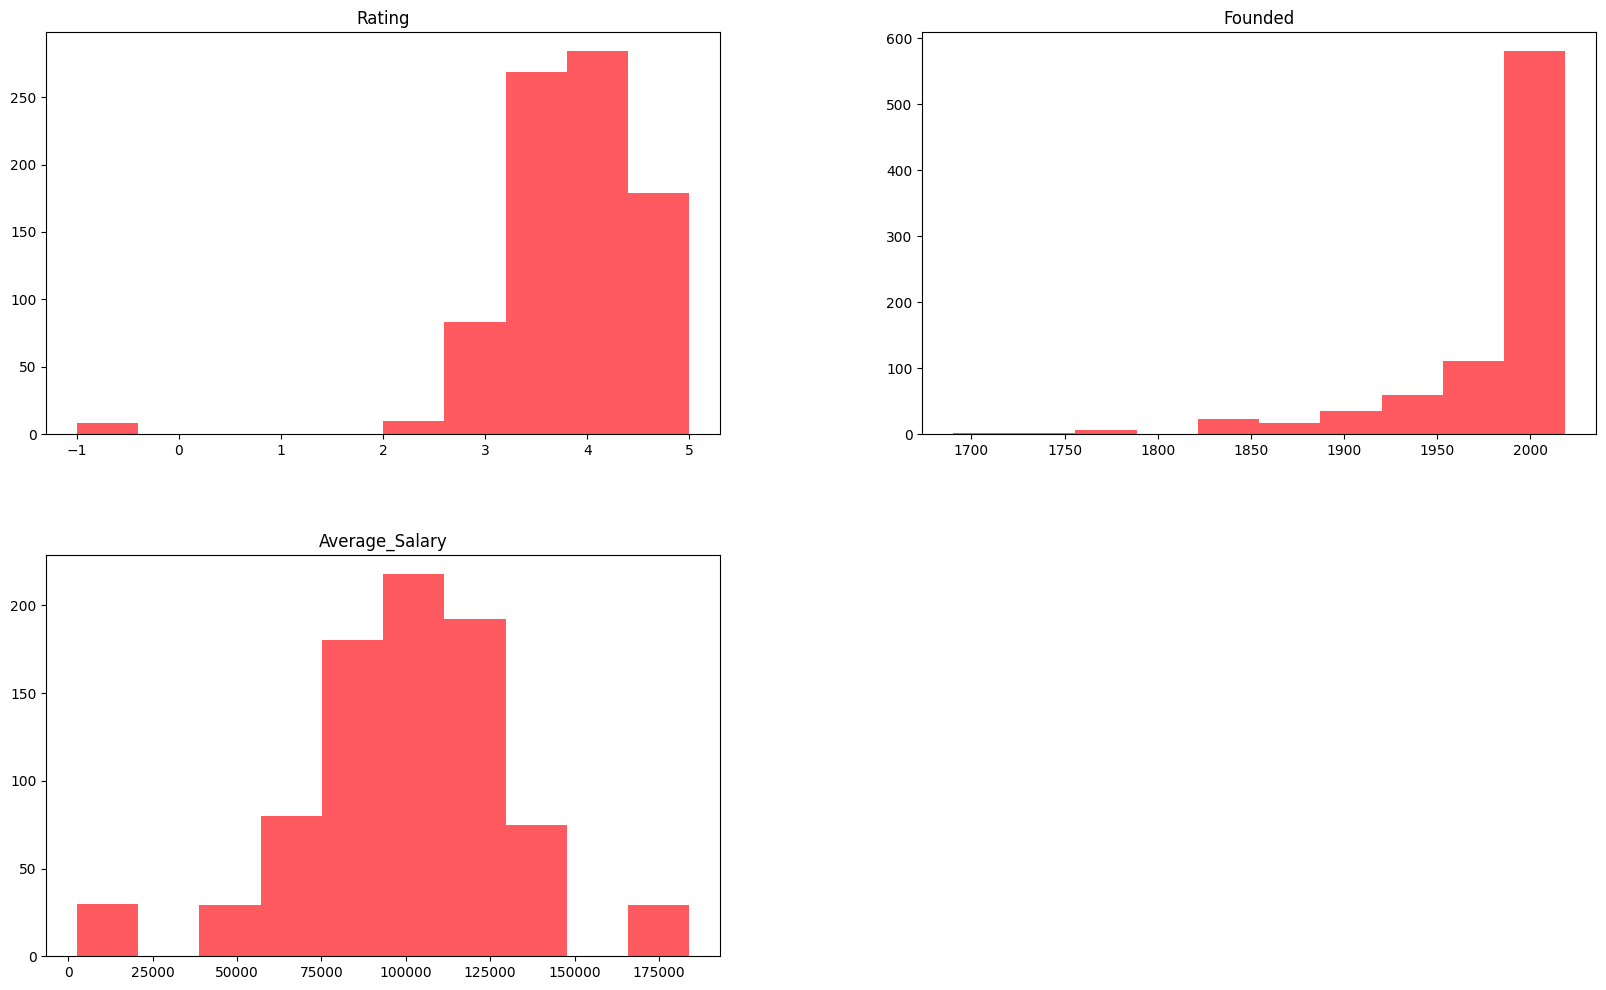

In [82]:
# We examined the patterns in numerical data by using histograms to visualize their distributions.
job_df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

 **<h1>1. How does the company rating vary based on the type of ownership?**

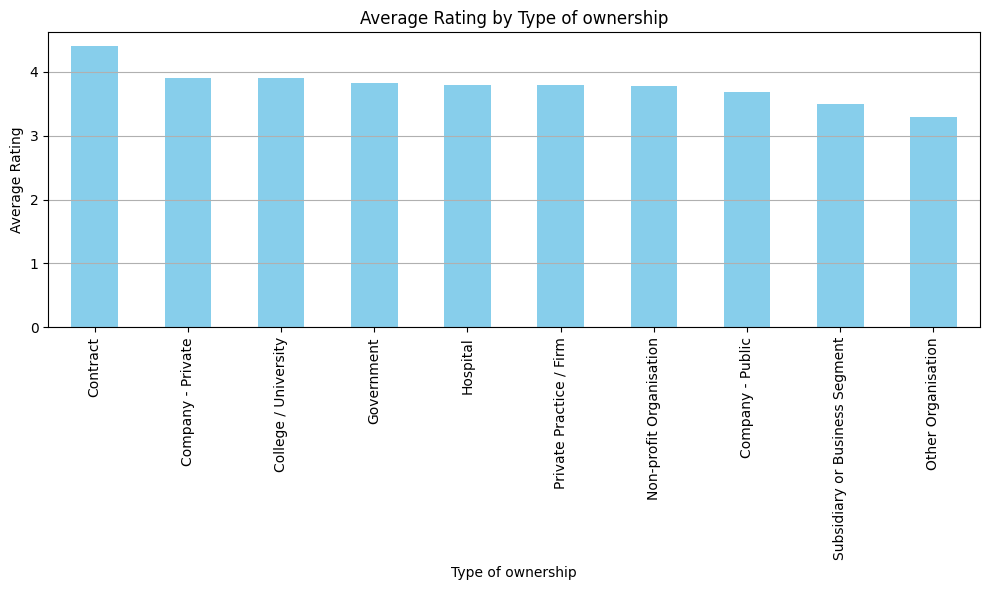

In [83]:
import matplotlib.pyplot as plt
avg_salary_by_industry = job_df.groupby('Type of ownership')['Rating'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_salary_by_industry.plot(kind='bar', color='skyblue')
plt.xlabel('Type of ownership')
plt.ylabel('Average Rating')
plt.title('Average Rating by Type of ownership')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**<h1>2. Are there any sectors that have higher average ratings than others?**

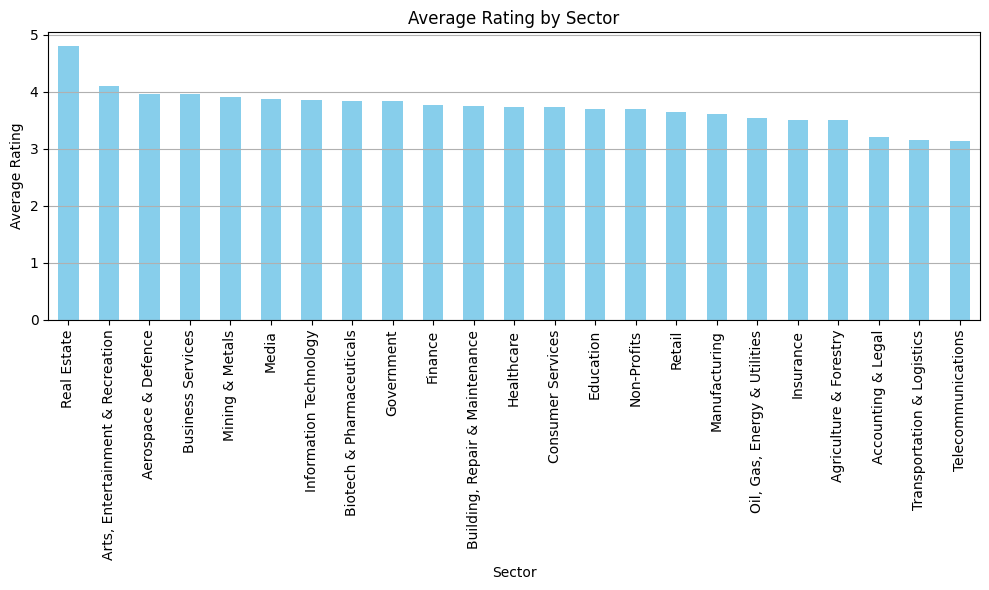

In [84]:
import matplotlib.pyplot as plt
avg_salary_by_industry = job_df.groupby('Sector')['Rating'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_salary_by_industry.plot(kind='bar', color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Average Rating')
plt.title('Average Rating by Sector')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**<h1>3. How does the average salary vary across different industries?**

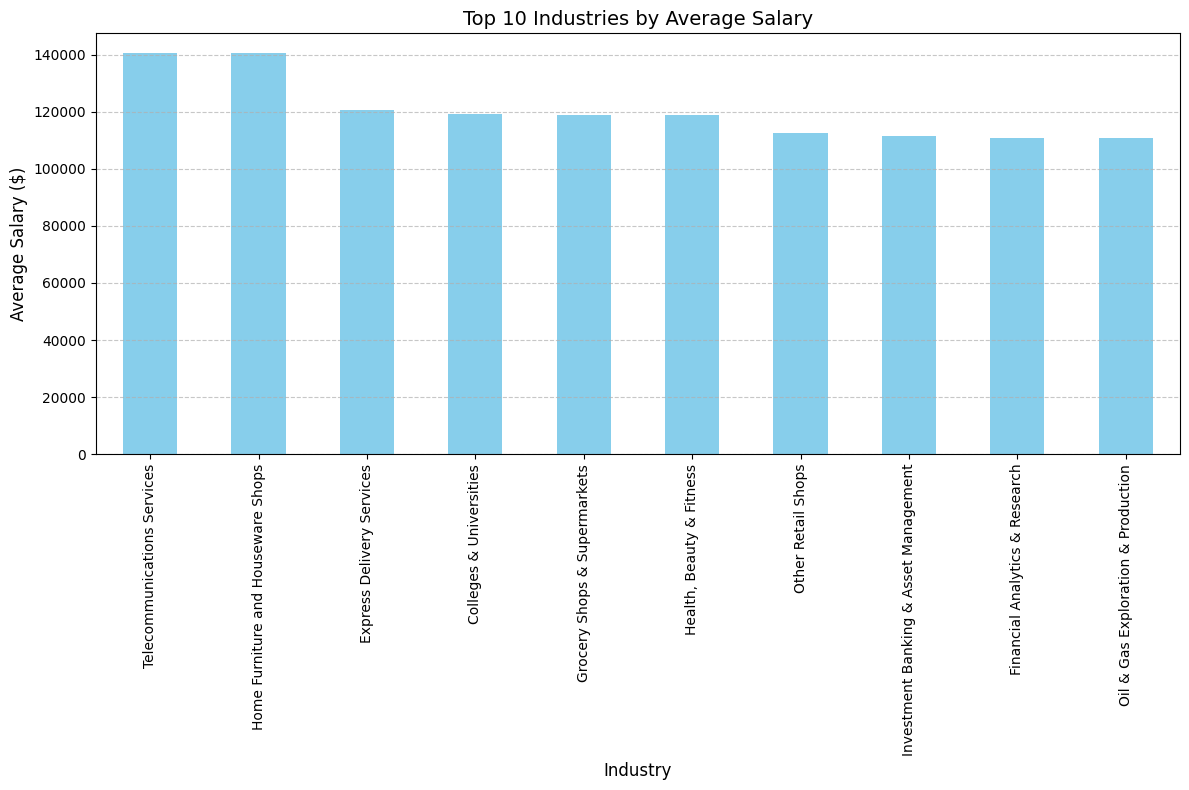

In [85]:
avg_salary_by_industry = job_df.groupby('Industry')['Average_Salary'].mean().sort_values(ascending=False)

# Select the top 10 industries by average salary
top_10_industries = avg_salary_by_industry.head(10)

# Plotting the bar chart for top 10 industries
plt.figure(figsize=(12, 8))  # Adjust figsize for better visualization
top_10_industries.plot(kind='bar', color='skyblue')

plt.xlabel('Industry', fontsize=12)  # Set label for x-axis
plt.ylabel('Average Salary ($)', fontsize=12)  # Set label for y-axis
plt.title('Top 10 Industries by Average Salary', fontsize=14)  # Set title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()  # Display the plot

**<h1>4. Which locations have the highest average salaries?**

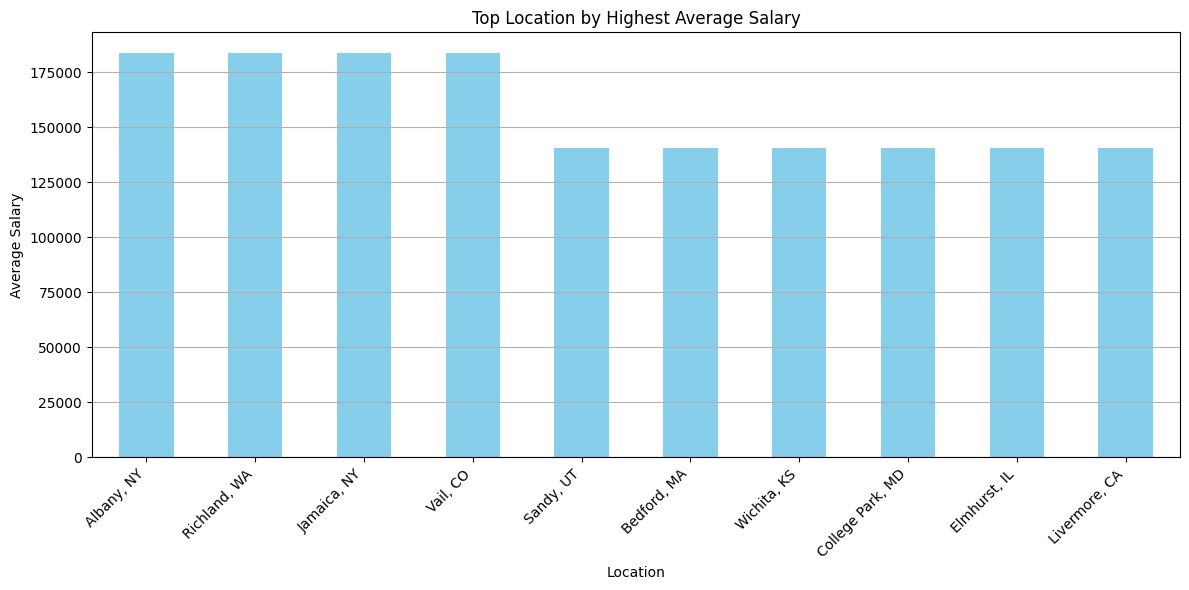

In [86]:
avg_salary_by_location = job_df.groupby('Location')['Average_Salary'].mean().sort_values(ascending=False)

# Plotting the bar chart for top industries by average salary
plt.figure(figsize=(12, 6))
avg_salary_by_location.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Top Location by Highest Average Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**<h1>Conclusion**
<h4>    
Our exploratory data analysis (EDA) has revealed important findings:

1. Companies categorized under 'Contract' ownership type exhibit the highest average rating of 4.5.
2. Within the dataset, the 'Real Estate' sector boasts the highest average rating of 4.8 compared to other sectors.
3. The 'Telecommunications Services' industry offers the highest average salary, amounting to $140,000.

4. Specific locations such as Albany, NY; Richland, WA; Jamaica, NY; and Vail, CO are associated with the highest average salaries, reaching up to $175,000.

These insights provide valuable information for understanding the relationships between ownership types, industry sectors, and geographical locations with respect to company ratings and salary levels. Such findings can inform decision-making processes and strategic planning within organizations across different sectors and regions.